# WeRateDogs Data Analysis

Import the libraries used in this project.

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
% matplotlib inline

## Gathering Data

**Step 1:** Read the given `twitter-archive-enhanced.csv` file into a pandas DataFrame.  

In [182]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


**Step 2a:** Request the `image_predictions.tsv` file using the imported `requests` library.

In [183]:
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_predictions_url)

with open("image_predictions.tsv", mode = 'wb') as f:
    f.write(response.content)

**Step 2b:** Read the `image_predictions.tsv` file into a pandas DataFrame. 

In [184]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Step 3a:** Access the Twitter API using the `tweepy` library and the twitter keys/tokens acquired through tweeter developers account.

In [50]:
consumer_key = '' #insert your consumer key
consumer_secret = '' #insert your consumer secret
access_token = '' #insert your access token
access_secret = '' #insert your access secreet

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

**Step 3b:** Convert tweet id-s from `twitter_archive_enhanced` DataFrame to strings then convert the pandas DataFrame into a python list object.

In [5]:
tweet_id = twitter_archive_enhanced['tweet_id']
tweet_id = tweet_id.astype(str)
tweet_id = tweet_id.values.tolist()

**Step 3c:** For each tweet id from `tweet_id` list get the json object via twitter API and add it to a new line in `tweet_json.txt` file. If the tweet is not found then append its tweet id to `deleted_tweets` list.

In [122]:
deleted_tweets = []
with open("tweet_json.txt", "w") as t:
    for t_id in tweet_id:
        try:
            tweet = api.get_status(t_id, tweet_mode='extended')
            json.dump(tweet._json, t)
            t.write('\n')
        except tweepy.TweepError as err:
            deleted_tweets.append(t_id)

**Step 3d:** Read the `tweet_json.txt` file line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count. 

In [185]:
twitter_list = []
with open("tweet_json.txt", "r") as t:
    for line in t:
        y = json.loads(str(line))
        tweet_id = y["id"]
        favorites = y["favorite_count"]
        retweets = y["retweet_count"]
        twitter_list.append({'tweet_id': int(tweet_id),
                            'favorites': int(favorites),
                            'retweets': int(retweets)})
        
twitter_additional = pd.DataFrame(twitter_list)    

## Assesing and Cleaning
At this point there are 3 data tables, which we will need to assess for quality and tidiness issues. The DataFrames are: `twitter_archive_enhanced`, `image_predictions` and `twitter_additional`.

**Step 1:** All three tables form one observational unit so they need to be merged into one table.

Assess

In [186]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [187]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [188]:
twitter_additional.head()

,favorites,retweets,tweet_id
0,36426,7747,892420643555336193
1,31374,5739,892177421306343426
2,23640,3799,891815181378084864
3,39734,7904,891689557279858688
4,37937,8540,891327558926688256


Clean

In [189]:
twitter_archive_master = twitter_archive_enhanced.join(image_predictions.set_index('tweet_id'), on = 'tweet_id')

In [190]:
twitter_archive_master = twitter_archive_master.join(twitter_additional.set_index('tweet_id'), on = 'tweet_id')

Test

In [191]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,36426.0,7747.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,31374.0,5739.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,23640.0,3799.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39734.0,7904.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37937.0,8540.0


**Step 2:** Some values in `rating_numerator` column do not make sense. These values need to be re-extracted from tweet texts, converted from strings to floats, and any rows with rating numerators greater than 15 will be dropped. 

Assess

In [192]:
twitter_archive_master.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

Clean

In [193]:
twitter_archive_master['rating_numerator'] = twitter_archive_master.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [194]:
twitter_archive_master.rating_numerator = twitter_archive_master.rating_numerator.astype(float)

In [195]:
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master['rating_numerator'] > 15].index, inplace = True)

Test

In [196]:
twitter_archive_master.rating_numerator.unique()

array([ 13.  ,  12.  ,  14.  ,  13.5 ,  11.  ,  10.  ,   6.  ,  15.  ,
         0.  ,   9.75,   7.  ,   9.  ,   8.  ,   1.  ,   5.  ,  11.27,
         3.  ,   4.  ,   9.5 ,  11.26,   2.  ])

**Step 3:** Values in `rating_denominator` column are not all 10. According to the rating system the denominator is supposed to be 10 in all cases and so they all should be set to 10.

Assess

In [197]:
twitter_archive_master.rating_denominator.unique()

array([10, 15, 11, 20,  2])

The following output explains why some of the denominators are not 10. The extraction picked up dates instead of the ratings in these cases, so both numerators and denominators need to be corrected for these tweets.

In [198]:
pd.options.display.max_colwidth = 500
twitter_archive_master.text[twitter_archive_master['rating_denominator'] != 10]

342                                                                                                         @docmisterio account started on 11/15/15
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1165                                                                                Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1598        Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating
1662     This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
2335        This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis o

Clean

Drop rows number 342 and 1598.

In [199]:
twitter_archive_master.drop([342, 1598], inplace = True)

Correct denominators in the rest of the rows.

In [200]:
twitter_archive_master.loc[784,'rating_numerator'] = 14
twitter_archive_master.loc[1068,'rating_numerator'] = 14
twitter_archive_master.loc[1165,'rating_numerator'] = 13
twitter_archive_master.loc[1662,'rating_numerator'] = 10
twitter_archive_master.loc[2335,'rating_numerator'] = 9

In [201]:
twitter_archive_master.rating_numerator[twitter_archive_master['rating_denominator'] != 10]

784     14.0
1068    14.0
1165    13.0
1662    10.0
2335     9.0
Name: rating_numerator, dtype: float64

Set all rating denomerators to 10.

In [202]:
twitter_archive_master.rating_denominator = 10.0

Test

In [203]:
twitter_archive_master.rating_numerator.unique()

array([ 13.  ,  12.  ,  14.  ,  13.5 ,  11.  ,  10.  ,   6.  ,  15.  ,
         0.  ,   9.75,   7.  ,   9.  ,   8.  ,   1.  ,   5.  ,  11.27,
         3.  ,   4.  ,   9.5 ,  11.26,   2.  ])

In [204]:
twitter_archive_master.rating_denominator.unique()

array([ 10.])

**Step 4:** There are incorrect names in the `names` column starting with lowercase letters. Replace those names with null values.

Assess

In [212]:
twitter_archive_master.name.sample(10)

1208    Bentley
2169      Tessa
448       Sunny
226        None
1911      Lenny
1894     Sophie
712      Stormy
647        None
761     Stanley
924         one
Name: name, dtype: object

Clean

In [213]:
mask = twitter_archive_master.name.str.islower()
twitter_archive_master.loc[mask, 'name'] = np.nan

Test

In [214]:
twitter_archive_master.name.str.islower().sum()

0

**Step 5:** There is missing data in columns `name`,`doggo`, `floofer`, `pupper`, `puppo `, which is represented via string "None" instead of null values. Replace those with null values.

Assess

In [215]:
twitter_archive_master.name[twitter_archive_master['name'] == "None"].head()

5     None
7     None
12    None
24    None
25    None
Name: name, dtype: object

In [216]:
twitter_archive_master.doggo[twitter_archive_master['doggo'] == "None"].head()

0    None
1    None
2    None
3    None
4    None
Name: doggo, dtype: object

In [217]:
twitter_archive_master.floofer[twitter_archive_master['floofer'] == "None"].head()

0    None
1    None
2    None
3    None
4    None
Name: floofer, dtype: object

In [218]:
twitter_archive_master.pupper[twitter_archive_master['pupper'] == "None"].head()

0    None
1    None
2    None
3    None
4    None
Name: pupper, dtype: object

In [219]:
twitter_archive_master.puppo[twitter_archive_master['puppo'] == "None"].head()

0    None
1    None
2    None
3    None
4    None
Name: puppo, dtype: object

Clean

In [220]:
def replace_with_nan(columns):
    for column in columns:
        mask = twitter_archive_master[column] == "None"
        twitter_archive_master.loc[mask, column] = np.nan

In [221]:
columns = ['name', 'doggo', 'floofer', 'pupper', 'puppo']
replace_with_nan(columns)

Test

In [222]:
len(twitter_archive_master.name[twitter_archive_master['name'] == "None"])

0

In [223]:
len(twitter_archive_master.doggo[twitter_archive_master['doggo'] == "None"])

0

In [224]:
len(twitter_archive_master.pupper[twitter_archive_master['pupper'] == "None"])

0

In [225]:
len(twitter_archive_master.puppo[twitter_archive_master['puppo'] == "None"])

0

**Step 6:** Dog stage is one variable and so it should be represented in one column instead of 4. Concaterate the 4 columns to 1 column to be named `dog_stage`. Add `", "` between concaterated strings. Replace empty values with nulls. Remove the original 4 columns.

Assess

In [226]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_master[cols].head()

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


Clean

In [227]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_master[cols] = twitter_archive_master[cols].fillna('')
twitter_archive_master['dog_stage'] = twitter_archive_master[cols].apply(lambda row: ''.join(row.values.astype(str)), axis = 1)

In [228]:
mask = (twitter_archive_master['dog_stage'].str.len() > 7)
twitter_archive_master.loc[mask].dog_stage.unique()

array(['doggopuppo', 'doggofloofer', 'doggopupper'], dtype=object)

In [229]:
mask1 = twitter_archive_master['dog_stage'] == 'doggopuppo'
mask2 = twitter_archive_master['dog_stage'] == 'doggofloofer'
mask3 = twitter_archive_master['dog_stage'] == 'doggopupper'
twitter_archive_master.loc[mask1] = 'doggo, puppo'
twitter_archive_master.loc[mask2] = 'doggo, floofer'
twitter_archive_master.loc[mask3] = 'doggo, pupper'
twitter_archive_master.loc[mask].dog_stage.unique()

array(['doggo, puppo', 'doggo, floofer', 'doggo, pupper'], dtype=object)

In [230]:
twitter_archive_master['dog_stage'] = twitter_archive_master['dog_stage'].replace('', np.nan)

In [231]:
twitter_archive_master.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [232]:
twitter_archive_master.drop(cols, axis = 1, inplace = True)

Test

In [233]:
twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'favorites', 'retweets', 'dog_stage'],
      dtype='object')

In [234]:
twitter_archive_master['dog_stage'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: dog_stage, dtype: object

**Step 7:** There are 193 non-null `retweeted_status_id` entries, which means those are retweets and the rows need to be removed.

Assess

In [235]:
mask = twitter_archive_master.retweeted_status_id.notna()
mask.value_counts()

False    2139
True      193
Name: retweeted_status_id, dtype: int64

Clean

In [236]:
twitter_archive_master = twitter_archive_master.drop(twitter_archive_master.loc[mask].index)

Test

In [237]:
mask = twitter_archive_master.retweeted_status_id.notna()
mask.value_counts()

False    2139
Name: retweeted_status_id, dtype: int64

**Step 8:** Drop the columns, which are not needed for our analysis ('in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'jpg_url', 'timestamp')

Assess

In [238]:
twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'favorites', 'retweets', 'dog_stage'],
      dtype='object')

Clean

In [239]:
cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'jpg_url', 'timestamp']
twitter_archive_master = twitter_archive_master.drop(cols, axis = 1)

Test

In [240]:
twitter_archive_master.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'favorites', 'retweets', 'dog_stage'],
      dtype='object')

**Step 9:** Not all column names are very descriptive. Rename the columns `name` and `img_num` to `dog_name` and `img_count`.

Assess

In [241]:
twitter_archive_master.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'favorites', 'retweets', 'dog_stage'],
      dtype='object')

Clean

In [242]:
twitter_archive_master = twitter_archive_master.rename(columns = {'name': 'dog_name',
                                        'img_num': 'img_count'})

Test

In [243]:
twitter_archive_master.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator',
       'dog_name', 'img_count', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorites', 'retweets',
       'dog_stage'],
      dtype='object')

**Step 10:** The are many rows with missing image prediction and/or favorites data, which should be dropped.

Assess

In [244]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2139 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id              2139 non-null object
text                  2139 non-null object
rating_numerator      2139 non-null object
rating_denominator    2139 non-null object
dog_name              1384 non-null object
img_count             1967 non-null object
p1                    1967 non-null object
p1_conf               1967 non-null object
p1_dog                1967 non-null object
p2                    1967 non-null object
p2_conf               1967 non-null object
p2_dog                1967 non-null object
p3                    1967 non-null object
p3_conf               1967 non-null object
p3_dog                1967 non-null object
favorites             2129 non-null object
retweets              2129 non-null object
dog_stage             332 non-null object
dtypes: object(18)
memory usage: 317.5+ KB


Clean

In [245]:
mask1 = twitter_archive_master.p1.isnull()
mask2 = twitter_archive_master.favorites.isnull()
twitter_archive_master = twitter_archive_master.drop(twitter_archive_master.loc[mask1].index)
twitter_archive_master = twitter_archive_master.drop(twitter_archive_master.loc[mask2].index)

Test

In [246]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id              1957 non-null object
text                  1957 non-null object
rating_numerator      1957 non-null object
rating_denominator    1957 non-null object
dog_name              1333 non-null object
img_count             1957 non-null object
p1                    1957 non-null object
p1_conf               1957 non-null object
p1_dog                1957 non-null object
p2                    1957 non-null object
p2_conf               1957 non-null object
p2_dog                1957 non-null object
p3                    1957 non-null object
p3_conf               1957 non-null object
p3_dog                1957 non-null object
favorites             1957 non-null object
retweets              1957 non-null object
dog_stage             294 non-null object
dtypes: object(18)
memory usage: 290.5+ KB


**Step 10:** Save the clean data frame to a new csv file.

In [247]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)


## Analysis and Visualization

In [2]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

### Statistical summary

In [249]:
cols = ['rating_numerator', 'favorites', 'retweets']
twitter_archive_master[cols].describe()

,rating_numerator,favorites,retweets
count,1957.000000,1957.000000,1957.000000
mean,10.546132,8314.419520,2464.943792
std,2.182476,12264.054776,4427.091037
min,0.000000,72.000000,11.000000
25%,10.000000,1769.000000,548.000000
50%,11.000000,3709.000000,1181.000000
75%,12.000000,10359.000000,2816.000000
max,14.000000,157347.000000,78354.000000


### Top 10 most popular tweets

In [250]:
twitter_archive_master.nlargest(10, ['favorites', 'retweets']).text

754                                                     Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
303                                                         Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
389                                                                                   This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
107                                      This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr
788                              Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC
58                                                               This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia 

### Top 10 most common dog names 

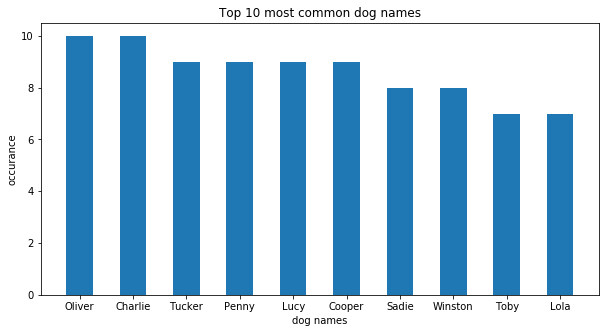

In [251]:
height = twitter_archive_master.dog_name.value_counts().head(10).values
bars = twitter_archive_master.dog_name.value_counts().head(10).index
y_pos = np.arange(len(bars))
plt.figure(figsize = (10,5))
plt.bar(y_pos, height, align = 'center', width = 0.5)
plt.title("Top 10 most common dog names")
plt.xlabel('dog names')
plt.ylabel('occurance')
plt.xticks(y_pos, bars)
plt.show()

### Top 5 most common dog breeds

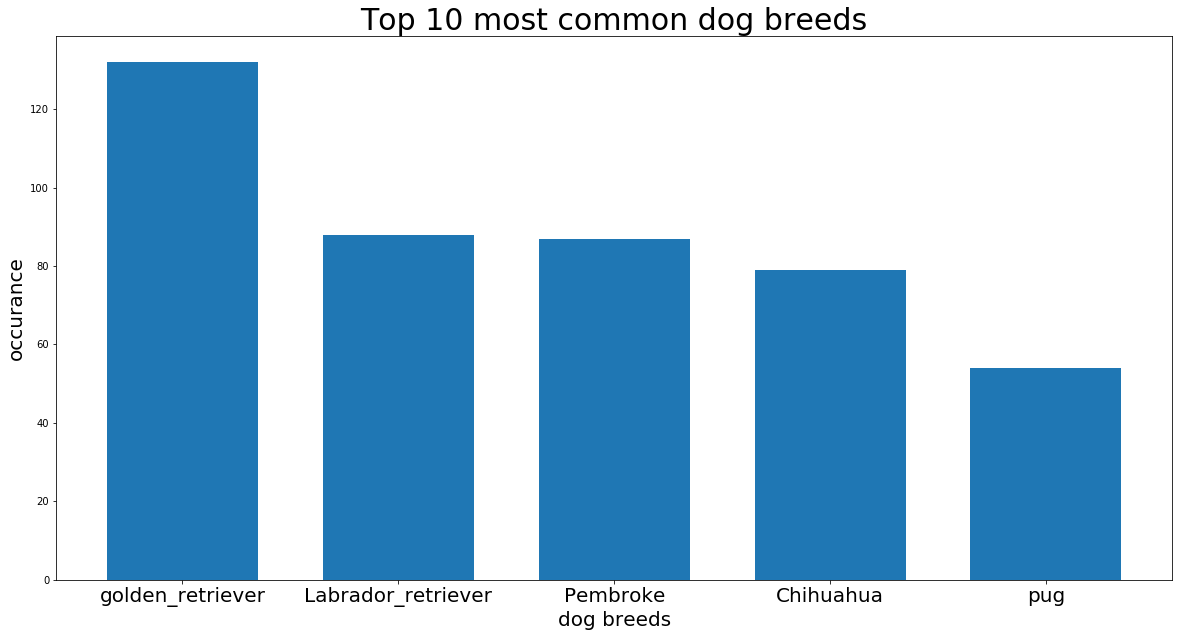

In [252]:
p1_true = twitter_archive_master.p1_dog == True
height = twitter_archive_master[p1_true].p1.value_counts().head(5).values
bars = twitter_archive_master[p1_true].p1.value_counts().head(5).index
y_pos = np.arange(len(bars))
plt.figure(figsize = (20,10))
plt.bar(y_pos, height, align = 'center', width = 0.7)
plt.title("Top 10 most common dog breeds", fontsize = 30)
plt.xlabel('dog breeds',fontsize = 20)
plt.ylabel('occurance',fontsize = 20)
plt.xticks(y_pos, bars, fontsize = 20)
plt.show()

### Most common dog stages

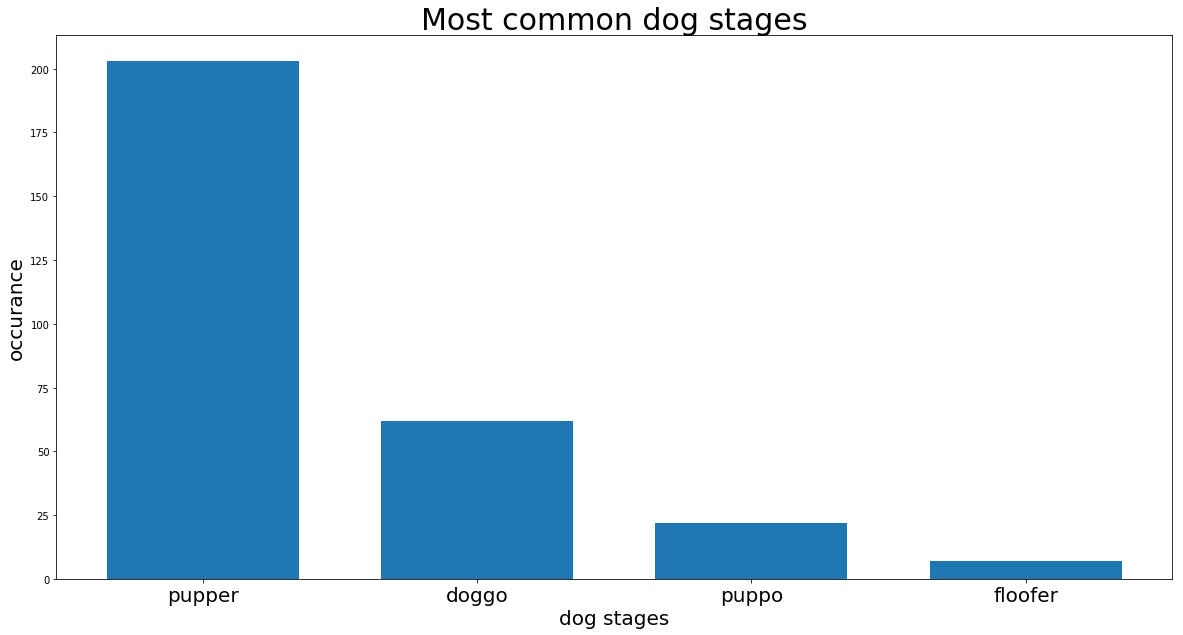

In [253]:
height = twitter_archive_master.dog_stage.value_counts().values
bars = twitter_archive_master.dog_stage.value_counts().index
y_pos = np.arange(len(bars))
plt.figure(figsize = (20,10))
plt.bar(y_pos, height, align = 'center', width = 0.7)
plt.title("Most common dog stages", fontsize = 30)
plt.xlabel('dog stages',fontsize = 20)
plt.ylabel('occurance',fontsize = 20)
plt.xticks(y_pos, bars, fontsize = 20)
plt.show()